In [86]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [87]:
# Load the dataset
data = pd.read_csv('C:/Users/sidmi/OneDrive/Desktop/MTU/Applied Machine Learning/Assignment 02/data.csv')

In [88]:
# Display the first few rows of the DataFrame
print('First 5 rows of the DataFrame:')
data.head()

First 5 rows of the DataFrame:


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [89]:
# Display basic information about the dataset
print('Dataset Information:')
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8

In [90]:
# Check for Duplicate values
print('Duplicate Values:')
data.duplicated().sum()

Duplicate Values:


0

Missing Values:


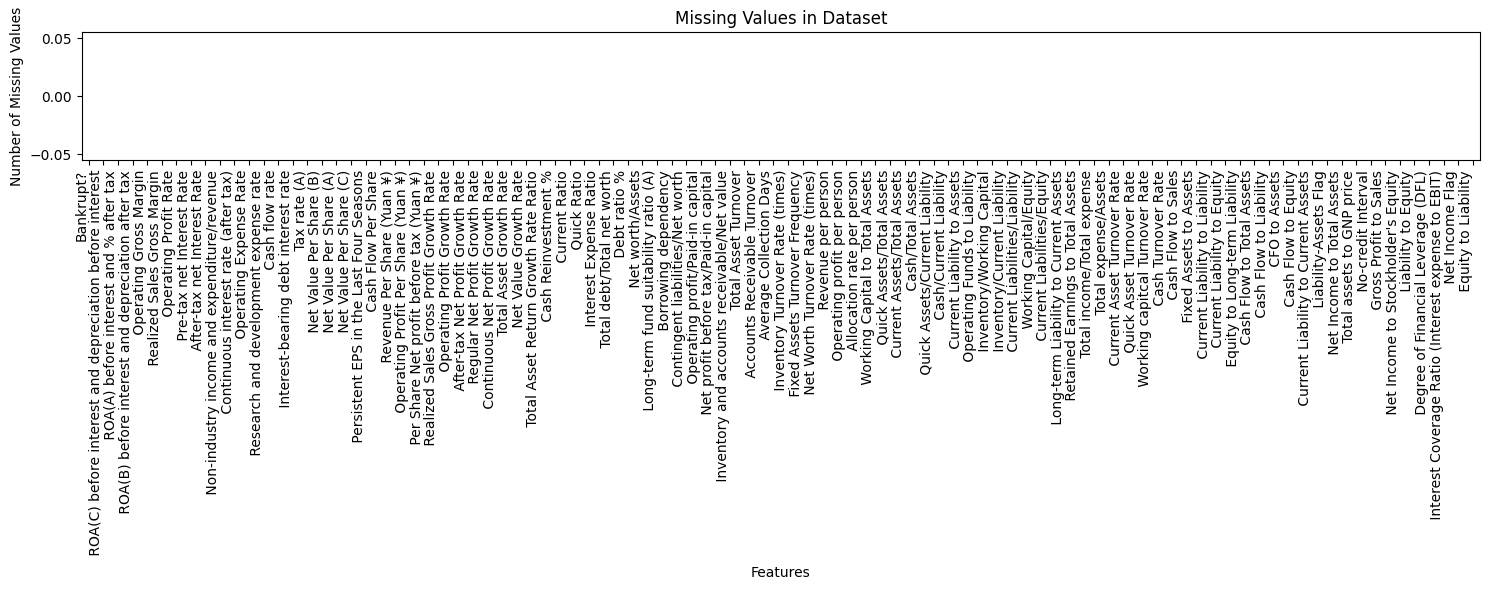

In [91]:
# Check for Missing values
print('Missing Values:')
missing_values = data.isnull().sum()

# Plot missing values
plt.figure(figsize=(15, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Dataset')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [92]:
# Display summary statistics for numerical features
print('Summary Statistics for Numerical Features:')
data.describe()

Summary Statistics for Numerical Features:


Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [93]:
# Check the Distribution of the target variable
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

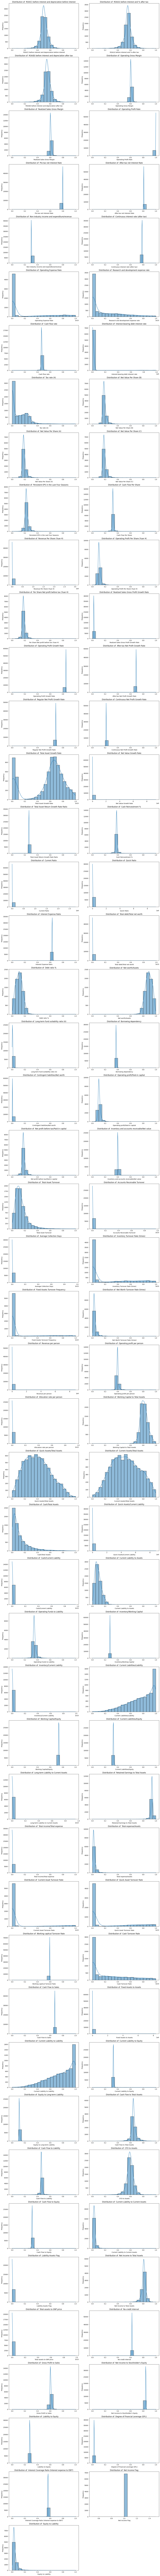

In [94]:
columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric = columns[1:]

# Define the number of rows and columns for subplots
num_rows = (len(numeric) + 1) // 2  # Add 1 and integer divide by 2 to ensure at least 1 row
num_cols = 2  # Two columns of plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Iterate over numerical features and create plots
for i, feature in enumerate(numeric):
    ax = axes[i]
    sns.histplot(data[feature], ax=ax, bins=20, kde=True)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Remove any empty subplot(s)
if len(numeric) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [95]:
# Calculate the correlation between the target variable and the independent variables
correlation_with_target = data.corr()['Bankrupt?'].sort_values(ascending=False)

# Display the correlation in a table
print("Correlation with target variable:")
print(correlation_with_target)

Correlation with target variable:
Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


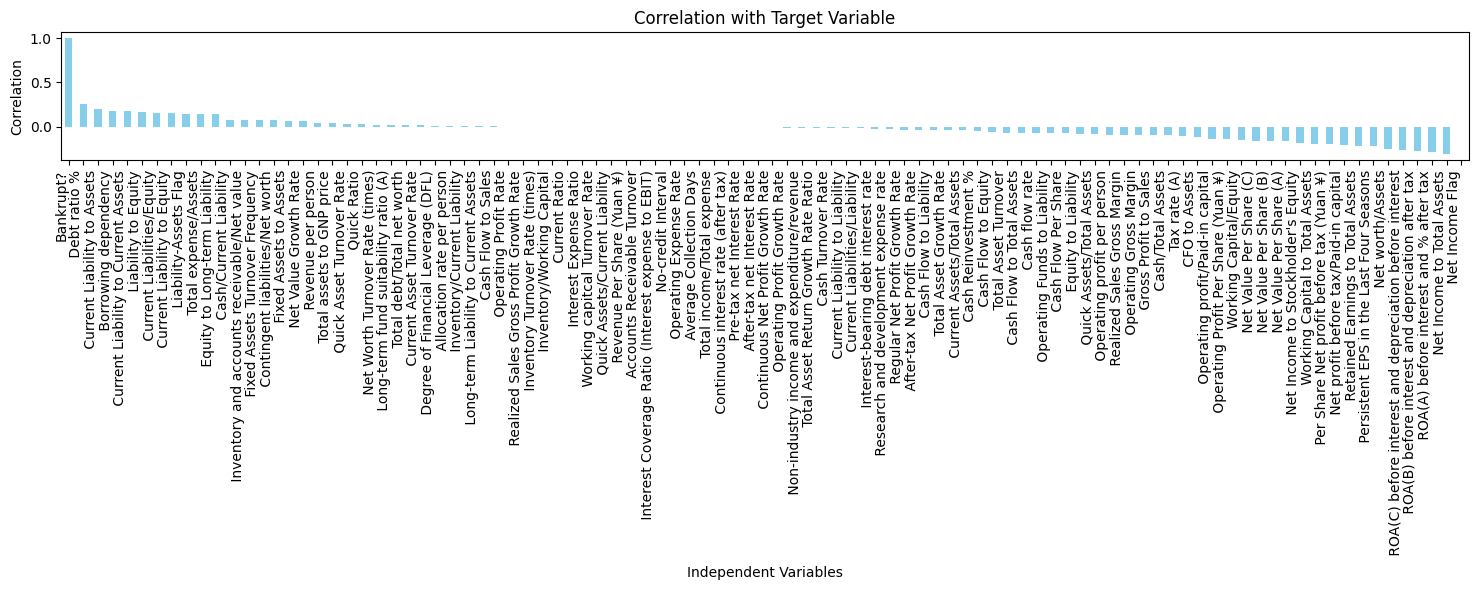

In [96]:
# Plot the correlation in a bar plot
plt.figure(figsize=(15, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [97]:
# Splitting the Dataset into independent and dependent (target) variables
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

**Correlation Analysis**

This code computes the correlation matrix among the features in a dataset X. It then identifies pairs of features that have a correlation coefficient equal to 1, indicating perfect correlation. If such pairs exist, it prints them out. Next, it removes one variable from each pair of features with perfect correlation to avoid multicollinearity. After removing redundant features, it recalculates the correlation matrix and checks again for pairs of features with perfect correlation. Finally, it visualizes the correlation matrix as a heatmap using seaborn's heatmap function, with annotations to display the correlation values. This heatmap provides a visual representation of the correlation between different features, helping to identify patterns and relationships within the dataset.

Pairs of features with 100% correlation:
(' Current Liabilities/Liability', ' Current Liability to Liability')
(' Current Liabilities/Equity', ' Current Liability to Equity')
(' Current Liability to Liability', ' Current Liabilities/Liability')
(' Current Liability to Equity', ' Current Liabilities/Equity')
No pairs of features have 100% correlation.


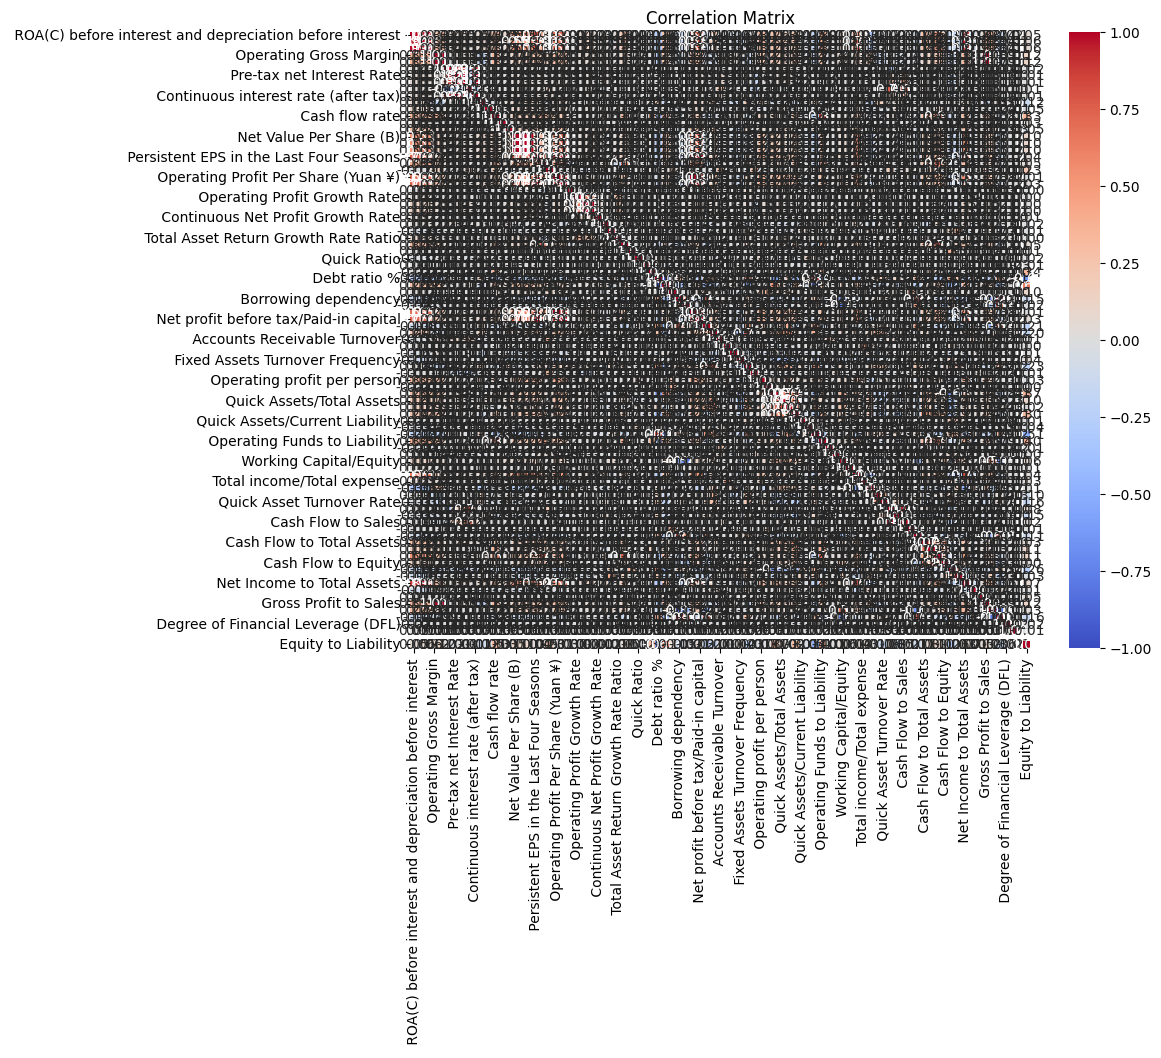

In [98]:
# Compute the correlation matrix among features
correlation_matrix = X.corr()

# Find pairs of features with correlation equal to 1 (perfect correlation)
pairs_with_100_corr = [(feature1, feature2) for feature1 in correlation_matrix.columns
                                        for feature2 in correlation_matrix.columns
                                        if feature1 != feature2 and correlation_matrix.loc[feature1, feature2] == 1]

# Display the pairs of features with 100% correlation
if len(pairs_with_100_corr) == 0:
    print("No pairs of features have 100% correlation.")
else:
    print("Pairs of features with 100% correlation:")
    for pair in pairs_with_100_corr:
        print(pair)

# Remove one variable from each pair with 100% correlation
for feature1, feature2 in pairs_with_100_corr:
    # Drop one of the variables from the DataFrame
    X.drop(columns=[feature1], inplace=True)  # Drop 'feature1'

# Compute the correlation matrix among features
correlation_matrix = X.corr()

# Find pairs of features with correlation equal to 1 (perfect correlation)
pairs_with_100_corr = [(feature1, feature2) for feature1 in correlation_matrix.columns
                                        for feature2 in correlation_matrix.columns
                                        if feature1 != feature2 and correlation_matrix.loc[feature1, feature2] == 1]

# Display the pairs of features with 100% correlation
if len(pairs_with_100_corr) == 0:
    print("No pairs of features have 100% correlation.")
else:
    print("Pairs of features with 100% correlation:")
    for pair in pairs_with_100_corr:
        print(pair)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Principal Component Analysis**

This code performs Principal Component Analysis (PCA) on a standardized dataset (X_scaled) to reduce the dimensionality of the features while preserving the variance.

First, the features are standardized using StandardScaler to ensure each feature has a mean of 0 and a standard deviation of 1. Then, PCA is applied to transform the standardized features into principal components (X_pca).

The code plots the explained variance ratio by the number of principal components to visualize the amount of variance explained by each component. It calculates the cumulative explained variance ratio and identifies the number of components needed to explain at least 90% of the variance (n_components_90).

Next, it selects the top principal components that contribute the most to the variance. These components are displayed along with their explained variance ratios. A bar plot is generated to visualize the explained variance ratio of the top components.

Finally, a DataFrame (X_top_components) containing the top principal components is created for further analysis or modeling. The DataFrame is displayed to show the selected principal components that explain at least 90% of the variance.








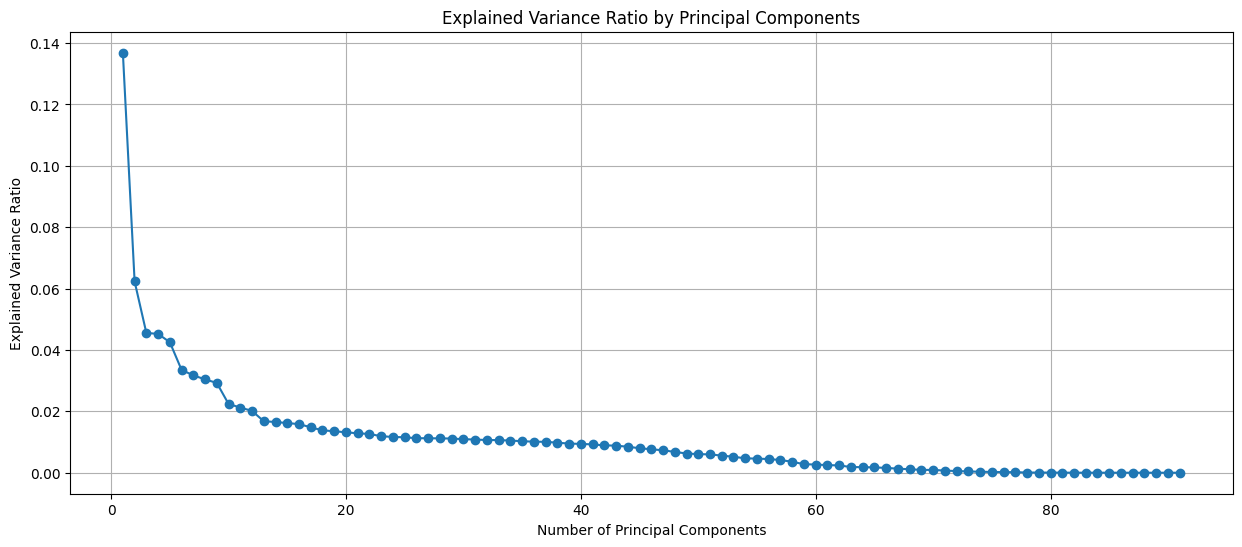

Variable  \
0    ROA(C) before interest and depreciation befor...   
1              ROA(A) before interest and % after tax   
2    ROA(B) before interest and depreciation after...   
3                              Operating Gross Margin   
4                         Realized Sales Gross Margin   
..                                                ...   
86                                Liability to Equity   
87                 Degree of Financial Leverage (DFL)   
88   Interest Coverage Ratio (Interest expense to ...   
89                                    Net Income Flag   
90                                Equity to Liability   

    Explained Variance Ratio  
0               1.368666e-01  
1               6.232600e-02  
2               4.554876e-02  
3               4.524458e-02  
4               4.252441e-02  
..                       ...  
86              8.240869e-11  
87              1.172523e-13  
88              2.218774e-20  
89              1.173823e-31  
90              9.549694e-34  

[91 rows x 2 columns]

Top Principal Components with highest variation (explaining at least 90% of variance):
                                             Variable  \
0    ROA(C) before interest and depreciation befor...   
1              ROA(A) before interest and % after tax   
2    ROA(B) before interest and depreciation after...   
3                              Operating Gross Margin   
4                         Realized Sales Gross Margin   
5                               Operating Profit Rate   
6                           Pre-tax net Interest Rate   
7                         After-tax net Interest Rate   
8         Non-industry income and expenditure/revenue   
9                Continuous interest rate (after tax)   
10                             Operating Expense Rate   
11              Research and development expense rate   
12                                     Cash flow rate   
13                Interest-bearing debt interest rate   
14                                       Tax rate (A)   
1

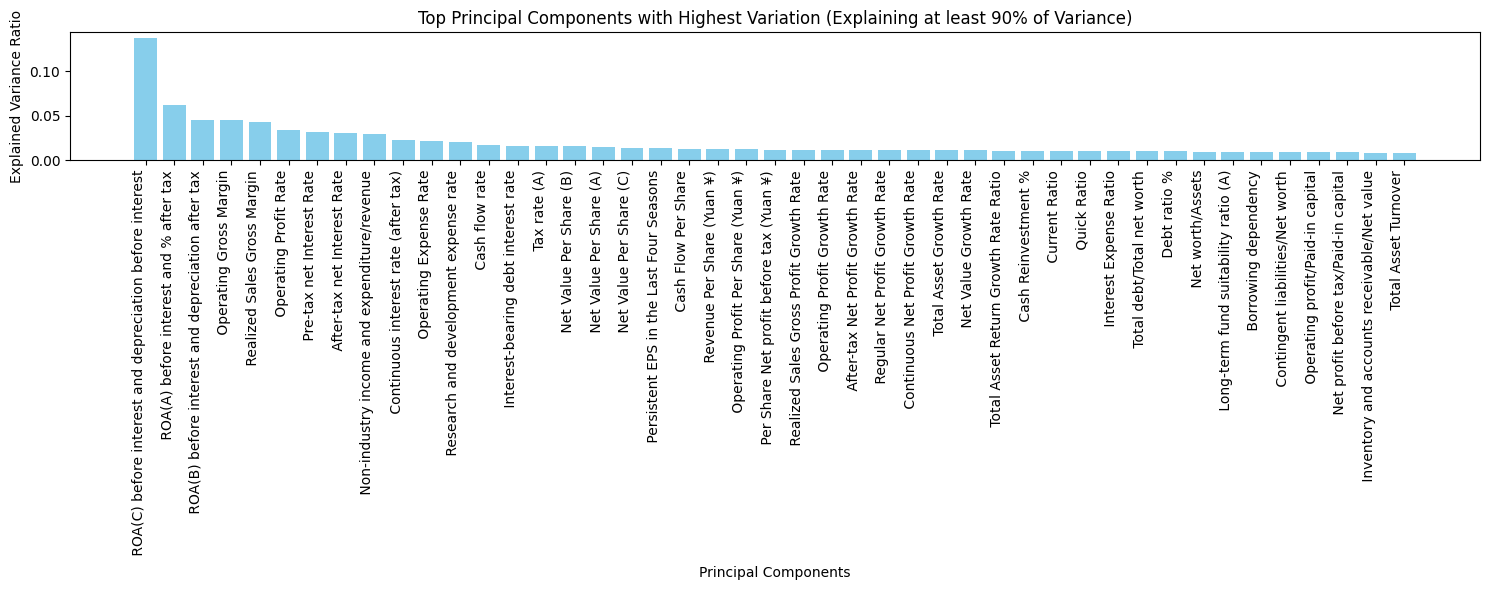

Top Principal Components with highest variation (explaining at least 90% of variance):


ROA(C) before interest and depreciation before interest  \
0                                             -7.237696         
1                                             -2.572861         
2                                             -4.186151         
3                                             -5.859703         
4                                             -2.479825         
...                                                 ...         
6814                                          -1.231089         
6815                                          -1.385335         
6816                                           1.891778         
6817                                           1.778461         
6818                                           0.985973         

      ROA(A) before interest and % after tax  \
0                                   0.985086   
1                                  -0.200392   
2                                   0.184161   
3                                  -0.513958   
4                                   0.316108   
...                                      ...   
6814                               -0.430476   
6815                               -0.395773   
6816                               -2.205913   
6817                               -0.898629   
6818                               -3.321907   

      ROA(B) before interest and depreciation after tax  \
0                                              0.611521   
1                                              0.776208   
2                                             -0.253654   
3                                              0.557303   
4                                             -0.467199   
...                                                 ...   
6814                                          -0.207964   
6815                                          -0.336995   
6816                                           0.491531   
6817                                           0.553290   
6818                                           0.309076   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                   0.380139                    -0.693168   
1                   0.889939                    -1.900008   
2                  -0.034823                    -0.067839   
3                   1.173883                    -2.338986   
4                   0.750059                    -1.106402   
...                      ...                          ...   
6814               -0.101322                     0.012198   
6815                0.427879                    -0.814839   
6816               -0.363783                     0.295463   
6817               -0.180249                    -0.126337   
6818               -0.913416                     0.435759   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  1.431328                   0.679723   
1                  0.551934                   0.452150   
2                 -0.325353                   0.183274   
3                  1.199474                  -0.783668   
4                  0.443672                  -0.565222   
...                     ...                        ...   
6814              -0.100375                   0.001683   
6815              -0.661026                  -0.265438   
6816              -2.133015                  -0.110105   
6817               0.728367                  -0.542713   
6818              -4.499240                   0.537739   

      After-tax net Interest Rate  \
0                       -1.249889   
1                       -1.281680   
2                       -0.339052   
3                       -0.157952   
4                       -0.153016   
...                           ...   
6814                    -0.004936   
6815                     0.255714   
6816                     1.639275   
6817                     0.106103   
6818                     0.467870   

      Non-industry income and expenditure/revenue  \
0          

In [99]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display variables and their explained variance ratio
variables_explained_variance = pd.DataFrame({'Variable': X.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Sort the DataFrame by explained variance ratio in descending order
variables_explained_variance = variables_explained_variance.sort_values(by='Explained Variance Ratio', ascending=False)

# Display all variables with their explained variance ratio in descending order
display(variables_explained_variance)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Find the number of components that explain at least 90% of the variance
n_components_90 = (cumulative_variance_ratio <= 0.9).sum() + 1  # Add 1 to include the next component

# Get the top components with highest variation
top_components = variables_explained_variance.head(n_components_90)

# Display top components with their explained variance ratio
print("Top Principal Components with highest variation (explaining at least 90% of variance):")
print(top_components)

# Plot the top components with their explained variance ratio
plt.figure(figsize=(15, 6))
plt.bar(top_components['Variable'], top_components['Explained Variance Ratio'], color='skyblue')
plt.title('Top Principal Components with Highest Variation (Explaining at least 90% of Variance)')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Get the indices of the top components
top_component_indices = top_components.index

# Create a DataFrame containing the top principal components
X_top_components = pd.DataFrame(X_pca[:, top_component_indices], columns=top_components['Variable'].tolist())

# Display the top principal components dataset
print("Top Principal Components with highest variation (explaining at least 90% of variance):")
display(X_top_components)

In [100]:
# Create a DataFrame containing the top principal components
X_top_components = pd.DataFrame(X_pca[:, top_component_indices], columns=top_components['Variable'].tolist())

In [102]:
# Splitting the dataset into the Part 1 set and Test set
X_1, X_test, y_1, y_test = train_test_split(X_top_components, y, test_size=0.2, random_state=42)

# Splitting the dataset into the Training Set and Validation Set
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

**Cross Fold Validation**

his code defines a dictionary models containing various machine learning models initialized with default hyperparameters. The models include Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, K-Nearest Neighbors, Naive Bayes, and Neural Network (Multi-layer Perceptron).

Next, the code performs model selection using cross-validation (cross_val_score) with 5 folds (cv=5). For each model, it calculates the average accuracy across all folds and stores the results in a dictionary results.

Finally, the code displays the average accuracy of each model by iterating over the results dictionary and printing the model name along with its average accuracy score. This process allows for the comparison of the performance of different machine learning models on the given dataset.

In [103]:
# Define the machine learning models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), # Increase max_iter
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(solver='adam', max_iter=1000)
}

# Perform model selection using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Perform 5-fold cross-validation
    results[name] = scores.mean()

# Display the average accuracy of each model
print("Average Accuracy of Each Model:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Average Accuracy of Each Model:
Logistic Regression: 0.9649
Decision Tree: 0.9453
Random Forest: 0.9660
Gradient Boosting: 0.9641
K-Nearest Neighbors: 0.9654
Naive Bayes: 0.9379
Neural Network: 0.9591


**Hyperparameter Tuning**

This code segment performs hyperparameter tuning for the top-performing machine learning models selected previously. It defines a dictionary top_models containing the top models, including Random Forest, Logistic Regression, Gradient Boosting, K-Nearest Neighbors, and Neural Network (Multi-layer Perceptron). Additionally, it defines a parameter grid param_grids for each model specifying the hyperparameters to be tuned.

The code then iterates over each model in top_models, performs grid search cross-validation (GridSearchCV) using the specified parameter grid, and fits the model to the training data. After hyperparameter tuning, it evaluates the model's performance on the validation set by computing precision, recall, F1-score, and AUC (Area Under the ROC Curve).

Finally, the code prints the evaluation metrics along with the best hyperparameters obtained after hyperparameter tuning for each model. This process allows for selecting the best-performing model configurations for further analysis or deployment.

In [104]:
# Define the top-performing models
top_models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(solver='adam', max_iter=1000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9]},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)]}
}

# Perform hyperparameter tuning and compute evaluation metrics
results = {}
best_params = {}
for name, model in top_models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    y_pred = best_model.predict(X_val)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    
    results[name] = {'Best Model': best_model, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC': auc}

# Display evaluation metrics for each model
print("Evaluation Metrics and Best Hyperparameters for Top-performing Models:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Best Model: {metrics['Best Model']}")
    print(f"Best Hyperparameters: {best_params[name]}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print(f"AUC: {metrics['AUC']:.4f}")
    print()

Evaluation Metrics and Best Hyperparameters for Top-performing Models:
Model: Random Forest
Best Model: RandomForestClassifier(n_estimators=200)
Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
Precision: 0.2000
Recall: 0.0238
F1-score: 0.0426
AUC: 0.5107

Model: Logistic Regression
Best Model: LogisticRegression(C=0.01, max_iter=1000)
Best Hyperparameters: {'C': 0.01}
Precision: 0.2727
Recall: 0.0714
F1-score: 0.1132
AUC: 0.5332

Model: Gradient Boosting
Best Model: GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)
Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Precision: 0.3333
Recall: 0.0714
F1-score: 0.1176
AUC: 0.5338

Model: K-Nearest Neighbors
Best Model: KNeighborsClassifier(n_neighbors=9)
Best Hyperparameters: {'n_neighbors': 9}
Precision: 0.3571
Recall: 0.1190
F1-score: 0.1786
AUC: 0.5567

Model: Neural Network
Best Model: MLPClassifier(max_iter=1000)
Best Hyperparameters: {'hidden_layer_sizes': (100,)}
Precision: 0.3514
Recall

**VotingClassifier (voting = 'soft')**

This code segment evaluates the top-performing machine learning models, including Random Forest, Logistic Regression, Gradient Boosting, K-Nearest Neighbors, and Neural Network, along with a VotingClassifier ensemble. Each model is trained on the training data (X_train and y_train), and their performance is evaluated using precision, recall, F1-score, and AUC metrics on the validation set (X_val and y_val). The evaluation results are stored in a list called results. Additionally, a VotingClassifier is created using the top-performing models, and its performance is evaluated similarly.

After evaluating all models, the code calculates the weighted average score for each model based on the specified weights for each metric (F1-score, AUC, Recall, Precision). The models are then sorted based on their weighted average scores in descending order. Finally, the best model based on the weighted average score is identified and displayed. This process allows for the selection of the best-performing model considering multiple evaluation metrics.

In [110]:
# Define the top-performing models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None)),
    ('Logistic Regression', LogisticRegression(C=0.01, max_iter=1000)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=9)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=models, voting='soft')

# Create a list to store evaluation results
results = []

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    
    results.append({'Model': name, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC': auc})

# Evaluate the VotingClassifier
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_val)
precision_voting = precision_score(y_val, y_pred_voting)
recall_voting = recall_score(y_val, y_pred_voting)
f1_voting = f1_score(y_val, y_pred_voting)
auc_voting = roc_auc_score(y_val, y_pred_voting)

# Add evaluation results for VotingClassifier
results.append({'Model': 'VotingClassifier', 'Precision': precision_voting, 'Recall': recall_voting, 
                'F1-score': f1_voting, 'AUC': auc_voting})

# Display evaluation metrics for all models
print("Evaluation Metrics for All Models:")
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1-score: {result['F1-score']:.4f}")
    print(f"AUC: {result['AUC']:.4f}")
    print()

# Assign weights to each metric
weights = {'F1-score': 1, 'AUC': 1, 'Recall': 1, 'Precision': 1}

# Calculate weighted average score for each model
for result in results:
    weighted_avg = sum(weights[metric] * result[metric] for metric in weights) / sum(weights.values())
    result['Weighted Average'] = weighted_avg

# Sort the results list based on weighted average score in descending order
results_sorted = sorted(results, key=lambda x: x['Weighted Average'], reverse=True)

# Get the best model based on weighted average score
best_model_weighted_avg = results_sorted[0]

# Display the best model based on weighted average score
print("Best Model based on Weighted Average Score (F1-score, AUC, Recall, Precision):")
print(f"Model: {best_model_weighted_avg['Model']}")
print(f"Precision: {best_model_weighted_avg['Precision']:.4f}")
print(f"Recall: {best_model_weighted_avg['Recall']:.4f}")
print(f"F1-score: {best_model_weighted_avg['F1-score']:.4f}")
print(f"AUC: {best_model_weighted_avg['AUC']:.4f}")
print()


Evaluation Metrics for All Models:
Model: Random Forest
Precision: 0.5000
Recall: 0.0714
F1-score: 0.1250
AUC: 0.5348

Model: Logistic Regression
Precision: 0.2727
Recall: 0.0714
F1-score: 0.1132
AUC: 0.5332

Model: Gradient Boosting
Precision: 0.3333
Recall: 0.0714
F1-score: 0.1176
AUC: 0.5338

Model: K-Nearest Neighbors
Precision: 0.3571
Recall: 0.1190
F1-score: 0.1786
AUC: 0.5567

Model: Neural Network
Precision: 0.3077
Recall: 0.2857
F1-score: 0.2963
AUC: 0.6344

Model: VotingClassifier
Precision: 0.3846
Recall: 0.1190
F1-score: 0.1818
AUC: 0.5570

Best Model based on Weighted Average Score (F1-score, AUC, Recall, Precision):
Model: Neural Network
Precision: 0.3077
Recall: 0.2857
F1-score: 0.2963
AUC: 0.6344



**VotingClassifier (voting = 'hard')**

In [115]:
# Define the top-performing models
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None)),
    ('Logistic Regression', LogisticRegression(C=0.01, max_iter=1000)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=9)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Create a list to store evaluation results
results = []

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    
    results.append({'Model': name, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC': auc})

# Evaluate the VotingClassifier
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_val)
precision_voting = precision_score(y_val, y_pred_voting)
recall_voting = recall_score(y_val, y_pred_voting)
f1_voting = f1_score(y_val, y_pred_voting)
auc_voting = roc_auc_score(y_val, y_pred_voting)

# Add evaluation results for VotingClassifier
results.append({'Model': 'VotingClassifier', 'Precision': precision_voting, 'Recall': recall_voting, 
                'F1-score': f1_voting, 'AUC': auc_voting})

# Display evaluation metrics for all models
print("Evaluation Metrics for All Models:")
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1-score: {result['F1-score']:.4f}")
    print(f"AUC: {result['AUC']:.4f}")
    print()

# Assign weights to each metric
weights = {'F1-score': 1, 'AUC': 1, 'Recall': 1, 'Precision': 1}

# Calculate weighted average score for each model
for result in results:
    weighted_avg = sum(weights[metric] * result[metric] for metric in weights) / sum(weights.values())
    result['Weighted Average'] = weighted_avg

# Sort the results list based on weighted average score in descending order
results_sorted = sorted(results, key=lambda x: x['Weighted Average'], reverse=True)

# Get the best model based on weighted average score
best_model_weighted_avg = results_sorted[0]

# Display the best model based on weighted average score
print("Best Model based on Weighted Average Score (F1-score, AUC, Recall, Precision):")
print(f"Model: {best_model_weighted_avg['Model']}")
print(f"Precision: {best_model_weighted_avg['Precision']:.4f}")
print(f"Recall: {best_model_weighted_avg['Recall']:.4f}")
print(f"F1-score: {best_model_weighted_avg['F1-score']:.4f}")
print(f"AUC: {best_model_weighted_avg['AUC']:.4f}")
print()


Evaluation Metrics for All Models:
Model: Random Forest
Precision: 0.7500
Recall: 0.0714
F1-score: 0.1304
AUC: 0.5354

Model: Logistic Regression
Precision: 0.2727
Recall: 0.0714
F1-score: 0.1132
AUC: 0.5332

Model: Gradient Boosting
Precision: 0.3333
Recall: 0.0714
F1-score: 0.1176
AUC: 0.5338

Model: K-Nearest Neighbors
Precision: 0.3571
Recall: 0.1190
F1-score: 0.1786
AUC: 0.5567

Model: Neural Network
Precision: 0.4074
Recall: 0.2619
F1-score: 0.3188
AUC: 0.6259

Model: VotingClassifier
Precision: 0.2500
Recall: 0.0476
F1-score: 0.0800
AUC: 0.5219

Best Model based on Weighted Average Score (F1-score, AUC, Recall, Precision):
Model: Neural Network
Precision: 0.4074
Recall: 0.2619
F1-score: 0.3188
AUC: 0.6259



**VotingClassifier on Neural Network (voting = 'soft')**

Performing VotingClassifier on Neural Network as it is the best performing model.

In [107]:
# Create a VotingClassifier including the Neural Network model
voting_clf = VotingClassifier(estimators=[('Neural Network', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))], voting='soft')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Evaluate the VotingClassifier
y_pred = voting_clf.predict(X_val)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

print("Evaluation Metrics for VotingClassifier with Neural Network:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Evaluation Metrics for VotingClassifier with Neural Network:
Precision: 0.3611
Recall: 0.3095
F1-score: 0.3333
AUC: 0.6476


**VotingClassifier on Neural Network (voting = 'hard')**

Performing VotingClassifier on Neural Network as it is the best performing model.

In [114]:
# Create a VotingClassifier including the Neural Network model
voting_clf = VotingClassifier(estimators=[('Neural Network', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))], voting='hard')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Evaluate the VotingClassifier
y_pred = voting_clf.predict(X_val)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

print("Evaluation Metrics for VotingClassifier with Neural Network:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Evaluation Metrics for VotingClassifier with Neural Network:
Precision: 0.2683
Recall: 0.2619
F1-score: 0.2651
AUC: 0.6215


**Model Performance on test dataset (with VotingClassifier parameter voting = 'soft')**

This code segment aims to evaluate the performance of the top-performing machine learning models, including Random Forest, Logistic Regression, Gradient Boosting, K-Nearest Neighbors, and Neural Network, on the test dataset (X_test and y_test). Initially, a VotingClassifier is created using these models with soft voting. Then, each individual model is trained on the training dataset (X_train and y_train), and their accuracy scores are computed on the test dataset. The accuracy results for each model are stored in a list called accuracy_results and subsequently displayed. This process allows for the assessment of how well the trained models generalize to unseen data.

In [116]:
# Define the top-performing model
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None)),
    ('Logistic Regression', LogisticRegression(C=0.01, max_iter=1000)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=9)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=models, voting='soft')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Create a list to store evaluation results
results = []

# Evaluate accuracy for model on the test dataset
accuracy_results = []

for name, model in models:
    model.fit(X_train, y_train)  # Fit model to the training data
    accuracy = model.score(X_test, y_test)  # Calculate accuracy on the test data
    accuracy_results.append({'Model': name, 'Accuracy': accuracy})

# Display accuracy for model on the test dataset
print("Model Accuracy on Test Dataset:")
for result in accuracy_results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print()


Model Accuracy on Test Dataset:
Model: Random Forest
Accuracy: 0.9648

Model: Logistic Regression
Accuracy: 0.9648

Model: Gradient Boosting
Accuracy: 0.9663

Model: K-Nearest Neighbors
Accuracy: 0.9670

Model: Neural Network
Accuracy: 0.9641



**Model Performance on test dataset (with VotingClassifier parameter voting = 'hard')**

In [117]:
# Define the top-performing model
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None)),
    ('Logistic Regression', LogisticRegression(C=0.01, max_iter=1000)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=9)),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000))
]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=models, voting='hard')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Create a list to store evaluation results
results = []

# Evaluate accuracy for model on the test dataset
accuracy_results = []

for name, model in models:
    model.fit(X_train, y_train)  # Fit model to the training data
    accuracy = model.score(X_test, y_test)  # Calculate accuracy on the test data
    accuracy_results.append({'Model': name, 'Accuracy': accuracy})

# Display accuracy for model on the test dataset
print("Model Accuracy on Test Dataset:")
for result in accuracy_results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print()


Model Accuracy on Test Dataset:
Model: Random Forest
Accuracy: 0.9648

Model: Logistic Regression
Accuracy: 0.9648

Model: Gradient Boosting
Accuracy: 0.9663

Model: K-Nearest Neighbors
Accuracy: 0.9670

Model: Neural Network
Accuracy: 0.9655

